In [1]:
import pandas as pd

In [15]:
from sklearn import cluster, datasets, metrics
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+"/datascience_eda") 

In [8]:
from datascience_eda import *
# !pip install wordcloud

In [19]:
df = pd.read_csv("data/menu.csv")

In [20]:
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


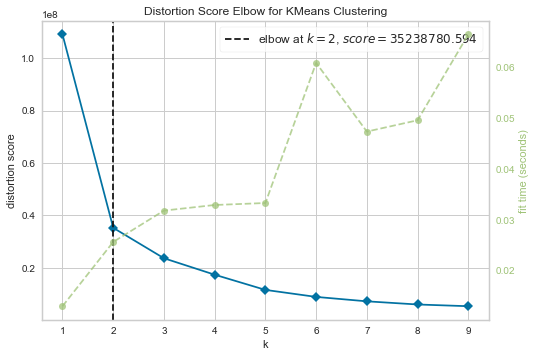

In [23]:
kmeans = KMeans()
num_cols = df.select_dtypes("number").columns.tolist()
x = df[num_cols]
kmeans.fit_predict(x)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x)  # Fit the data to the visualizer
visualizer.show();

In [25]:
type(visualizer)

yellowbrick.cluster.elbow.KElbowVisualizer

In [26]:
visualizer.elbow_value_

2

In [29]:
visualizer.elbow_score_

35238780.59378326

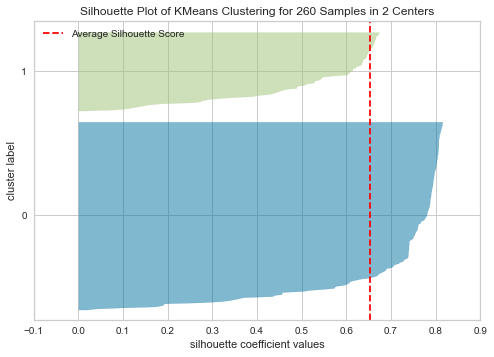

In [31]:
kmeans = KMeans(2)
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(x)  # Fit the data to the visualizer
visualizer.show(); # Finalize and render the figure


In [32]:
visualizer

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 260 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=2))

In [33]:
type(visualizer)

yellowbrick.cluster.silhouette.SilhouetteVisualizer

In [52]:
visualizer.ax.title.get_text()

'Silhouette Plot of KMeans Clustering for 260 Samples in 2 Centers'

In [43]:
visualizer.ax

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 260 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca_clusters(data, labels):
    """
    Carries out dimensionality reduction on the data for visualization
    """
    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(data)
    pca_df = pd.DataFrame(
        data=principal_comp, columns=["pca1", "pca2"], index=data.index
    )
    pca_df["cluster"] = labels
    fig = plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(
        x="pca1", y="pca2", hue="cluster", data=pca_df, palette="tab10"
    )
    plt.show()
    return fig

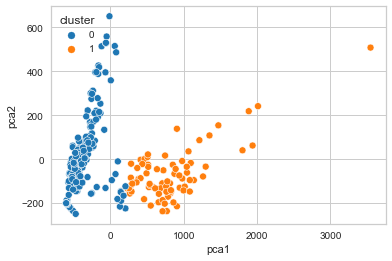

In [60]:
import seaborn as sns
labels = kmeans.predict(x)
fig = plot_pca_clusters(x,labels )

In [62]:
type(fig)

matplotlib.figure.Figure

In [64]:
fig.__str__()

'Figure(432x288)'

In [82]:
fig.axes

[<AxesSubplot:xlabel='pca1', ylabel='pca2'>]

In [91]:
results = {}
type(results)

dict